## 2. Support vector machine

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC

### (a) Is this data linearly separable?

In [2]:
print('Yes')

Yes


### (b) Use sklearn.svm.SVC to fit a support vector machine classifier to the data. You will need to invoke the option kernel=’linear’. Try at least 10 different values of the slack parameter C. In your writeup, include a table that shows these values of C and for each of them gives the training error and the number of support vectors.

In [3]:
from sklearn import datasets 
iris = datasets.load_iris() 
x = iris.data
y = iris.target

In [4]:
x_inputs_1 = x[:, [0, 2]]
x_inputs = x_inputs_1[y!=0]
y_labels = y[y!= 0]

In [5]:
C_list = [100, 10, 1, 0.1, 0.001, 0.000001, 0.000000001 ,0.000000000001 ,0.000000000000001 ,0.000000000000000001]
error_list = []
num = []
for C in C_list:
    #print('\nC =', C)
    svc = SVC(kernel='linear', C=C).fit(x_inputs, y_labels)
    error = 1- svc.score(x_inputs, y_labels)
    #print('training_error =', error)
    error_list.append(error)
    num.append(svc.n_support_)
    #print('number_of_support_vectors =', svc.n_support_)

total_list = pd.DataFrame({'C' : C_list,
                            'Training Error' : error_list,
                            'Number of support vectors' : num }, 
                                columns=['C','Training Error', 'Number of support vectors'])
total_list

,C,Training Error,Number of support vectors
0,1.000000e+02,0.05,"[7, 7]"
1,1.000000e+01,0.05,"[9, 9]"
2,1.000000e+00,0.07,"[16, 15]"
3,1.000000e-01,0.07,"[28, 28]"
4,1.000000e-03,0.17,"[50, 50]"
5,1.000000e-06,0.17,"[50, 50]"
6,1.000000e-09,0.17,"[50, 50]"
7,1.000000e-12,0.17,"[50, 50]"
8,1.000000e-15,0.16,"[50, 50]"
9,1.000000e-18,0.50,"[50, 50]"


### (c) Which value of C do you think is best? For this value, include a plot of the data points and the linear decision boundary.

In [6]:
print('C = 1 is the best')

C = 1 is the best


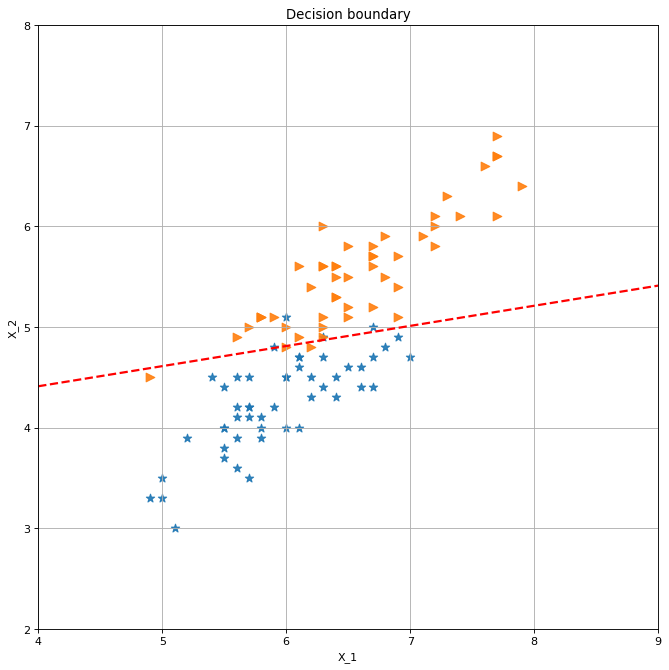

In [7]:
clf = SVC(kernel='linear', C=1)
clf.fit(x_inputs, y_labels)

# Plot the data and the classification with the decision boundary.
xmin, xmax = 4, 9
ymin, ymax = 2, 8

xd = np.array([xmin, xmax])

weights1 = clf.coef_[0]
bias1 = clf.intercept_[0]
slope1 = - weights1[0]/weights1[1]
x2cut1 = - bias1/weights1[1]
yd1 = slope1*xd + x2cut1

from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)

plt.title('Decision boundary')
plt.xlabel('X_1')
plt.ylabel('X_2')

plt.plot(xd, yd1, 'r', lw=2, ls='--')

plt.scatter(*x_inputs[:,[0,1]][y_labels==1].T, s = 60, alpha = 0.9, marker = '*')
plt.scatter(*x_inputs[:,[0,1]][y_labels==2].T, s = 60, alpha = 0.9, marker = '>')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.grid()
plt.show()